<a href="https://colab.research.google.com/github/zerahtp/customer-sales-prediction/blob/main/M%C3%BC%C5%9Fteri_Segmentasyonu_ve_Sat%C4%B1%C5%9F_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perakende sektöründe faaliyet gösteren bir şirketin pazarlama ve satış stratejilerini geliştirmek için müşteri segmentasyonu ve satış tahmini yapması gerekmektedir. Bu amaç doğrultusunda, Online Retail II veri setini kullanarak analizler yapacağız. Online Retail II veri seti, 2009-2011 yılları arasında İngiltere merkezli bir online perakendeciden alınan işlemleri içerir. Bu veri seti, müşteri segmentasyonu ve satış tahmini için oldukça değerlidir çünkü müşterilerin alışveriş alışkanlıkları ve satın alma davranışları hakkında kapsamlı bilgiler sunar.



### **Veri Setinin İndirilmesi ve Kullanımı**

Öncelikle, Kaggle'da bulunan Online Retail II veri setini Google Colab üzerinde kullanabilmemiz için indirmemiz gerekiyor. Bu adımları izleyerek veri setini nasıl indireceğimizi ve yükleyeceğimizi öğreneceğiz.

**1. Kaggle API Anahtarını İndirme**

Kaggle, veri setlerini indirmek ve kullanmak için bir API sağlar. Bu API'yi kullanabilmek için bir API anahtarına ihtiyacımız var. İşte adımlar:

* Kaggle Hesabına Giriş Yapma: İlk olarak, Kaggle hesabınıza giriş yapmanız
 gerekiyor. Eğer bir Kaggle hesabınız yoksa, Kaggle'a kayıt olarak bir hesap oluşturabilirsiniz.
*  API Anahtarını Oluşturma: Profilinize gidip "Account" sekmesine tıklayın. Burada "API" bölümünü bulacaksınız. "Create New API Token" butonuna tıklayarak kaggle.json adlı bir dosya indireceksiniz. Bu dosya, Kaggle API anahtarınızı içerir.



In [ ]:
# Google Colab'da gerekli kütüphaneleri yükleyelim
!pip install kaggle pandas matplotlib seaborn scikit-learn

**2. Google Colab'da Kaggle API Anahtarını Yükleme**

API anahtarını indirdikten sonra, Google Colab ortamında kullanabilmek için bu dosyayı yüklememiz gerekiyor. Bu adımları takip edin:
*   Google Colab'da Yeni Notebook Açma: Google Colab'da yeni bir notebook açın.
*   API Anahtarını Yükleme: Aşağıdaki kodu çalıştırarak bilgisayarınızdan kaggle.json dosyasını Colab'a yükleyin.

Bu kodu çalıştırdığınızda, bilgisayarınızdan kaggle.json dosyasını seçerek Colab'a yüklemeniz istenecek.

In [ ]:
# Kaggle API anahtarını yükleyin (Kaggle API anahtarınızı kaggle.json dosyasından yükleyin)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zehrahatipolu","key":"539bc4b26a089fe8e949cc5ac8456a79"}'}

*   Artık Kaggle API anahtarımızı yüklediğimize göre, veri setini indirebiliriz. Aşağıdaki kodu çalıştırarak veri setini indirelim. Bu komut, Kaggle'dan veri setini indirir ve çalışma dizininize kaydeder.




In [ ]:
# Kaggle API ile veri setini indirin
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mathchi/online-retail-ii-data-set-from-ml-repository

Dataset URL: https://www.kaggle.com/datasets/mathchi/online-retail-ii-data-set-from-ml-repository
License(s): DbCL-1.0
 97% 56.0M/57.5M [00:03<00:00, 23.1MB/s]
100% 57.5M/57.5M [00:03<00:00, 15.9MB/s]


**3. Veri Setini Çıkarma ve Yükleme**

İndirilen zip dosyasını çıkarmamız ve veri setini yüklememiz gerekiyor. Aşağıdaki adımları izleyin.

*   Bu kod, zip dosyasını data adlı bir klasöre çıkarır.



In [ ]:
# Dosyayı açalım ve gerekli kütüphaneleri yükleyelim
import pandas as pd
import zipfile

with zipfile.ZipFile('online-retail-ii-data-set-from-ml-repository.zip', 'r') as zip_ref:
    zip_ref.extractall('data')



*   Bu kod, çıkarılan Excel dosyasını yükler.




In [ ]:
# Veri setini yükleyelim
data = pd.read_excel('data/online_retail_II.xlsx')

# **Adım 1: Veri Keşfi ve Ön İşleme**

Veri setini başarıyla yükledikten sonra, veri keşfi ve ön işleme adımlarına geçebiliriz. Bu adımlar, veri setinin temizlenmesini ve analiz için hazır hale getirilmesini sağlar. Veri temizleme adımlarında, eksik verileri ele alacak, hatalı veya mantıksız verileri temizleyecek ve veri setini analizlerimiz için uygun hale getireceğiz.

Bu adımları tamamladıktan sonra, müşteri segmentasyonu ve satış tahmini için gerekli analizlere başlayabiliriz. Bu süreç, perakende şirketinin pazarlama stratejilerini geliştirmesine ve müşteri memnuniyetini artırmasına yardımcı olacaktır.

**1. Veri Keşfi**

Veri setimizin yapısını anlamak için ilk olarak birkaç temel keşif adımını gerçekleştirelim. Bu adımlar, veri setindeki genel özellikleri ve istatistikleri anlamamıza yardımcı olur.

Bu kodlar, veri setimizin genel yapısını, temel istatistiklerini ve eksik verileri görmemizi sağlar. Bu bilgiler, veri setini temizlemek ve analizler için uygun hale getirmek için gereklidir.

In [ ]:
# İlk birkaç satıra bakalım
print(data.head())

# Temel istatistikler
print(data.describe())

# Veri setinin yapısını anlamak için genel bilgi
print(data.info())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -

**2. Veri Temizleme ve Eksik Verilerin Ele Alınması**

Eksik ve hatalı verileri temizlemek, veri analizinde önemli bir adımdır. Veri temizleme işlemleri, analizlerin doğruluğunu artırmak ve güvenilir sonuçlar elde etmek için kritik öneme sahiptir.  Eksik veya hatalı veriler, analizlerimizi yanıltabilir ve yanlış sonuçlara yol açabilir. Bu adımda, eksik verileri ele alacağız ve mantıksız veya hatalı verileri temizleyeceğiz.

Bu kodlar, eksik ve hatalı verileri temizler. CustomerID eksik olan satırlar kaldırılır, negatif veya sıfır değer içeren Quantity ve UnitPrice satırları temizlenir.

In [ ]:
# Eksik verileri kontrol edelim
print(data.isnull().sum())

# Eksik verileri temizleyelim (örneğin, CustomerID eksik olanları kaldırabiliriz)
data_cleaned = data.dropna(subset=['Customer ID'])

# Negatif veya hatalı değerleri kontrol edelim ve temizleyelim
data_cleaned = data_cleaned[data_cleaned['Quantity'] > 0]
data_cleaned = data_cleaned[data_cleaned['Price'] > 0]

# Ürün açıklamalarında boş değerleri kontrol edin ve çıkarın
data_cleaned = data_cleaned.dropna(subset=['Description'])

# Ülke bilgilerinde boş değerleri kontrol edin ve çıkarın
data_cleaned = data_cleaned.dropna(subset=['Country'])

# Temizlenmiş verinin ilk birkaç satırına bakalım
print(data_cleaned.head())




Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


# **Adım 2: Müşteri Segmentasyonu**

Veri temizleme ve ön işleme adımlarını tamamladıktan sonra, müşteri segmentasyonu için uygun algoritmayı seçebilir ve uygulayabiliriz.

Müşteri segmentasyonu, müşterileri benzer özelliklerine ve davranışlarına göre gruplandırma işlemidir. Bu işlem, pazarlama stratejilerini optimize etmek, müşteri memnuniyetini artırmak ve satışları maksimize etmek için kritik öneme sahiptir. Bu adımda, müşteri segmentasyonu için uygun bir algoritma seçecek, segmentasyon sonuçlarını görselleştirecek ve her segmentin özelliklerini açıklayarak pazarlama stratejileri için önerilerde bulunacağız.

**Müşteri Segmentasyonu için K-Means Algoritmasını Kullanma**

Müşteri segmentasyonu için birçok algoritma kullanılabilir. K-Means algoritması, basitliği ve etkinliği nedeniyle yaygın olarak tercih edilir. K-Means algoritması, müşterileri benzerliklerine göre K farklı segmente ayırır. Bu örnekte, müşterileri toplam harcama miktarına (TotalPrice) ve satın alma sıklığına (PurchaseFrequency) göre segmentlere ayıracağız.

Bu kod, K-Means algoritmasını kullanarak müşterileri dört segmente ayırır ve bu segmentleri toplam harcama miktarı ve satın alma sıklığına göre görselleştirir.;

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


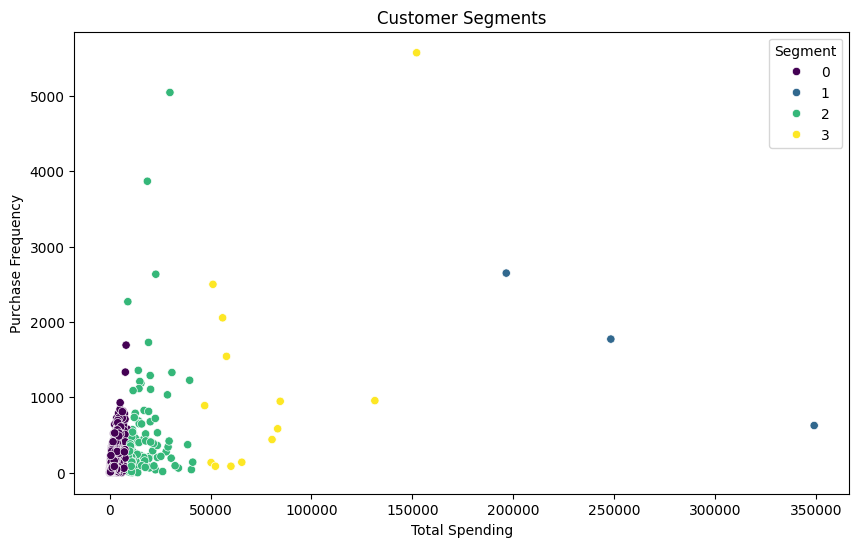

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Gerekli kütüphaneleri yükleyelim
import numpy as np

# Toplam harcama miktarını ve satın alma sıklığını hesaplayalım
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['Price']
customer_data = data_cleaned.groupby('Customer ID').agg({
    'TotalPrice': 'sum',
    'Invoice': 'count'
}).rename(columns={'Invoice': 'PurchaseFrequency'})

# K-Means algoritması için veriyi hazırlayalım
X = customer_data[['TotalPrice', 'PurchaseFrequency']]

# K-Means algoritmasını uygulayalım
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Segment etiketlerini ekleyelim
customer_data['Segment'] = kmeans.labels_

# Segmentleri görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalPrice', y='PurchaseFrequency', hue='Segment', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Spending')
plt.ylabel('Purchase Frequency')
plt.show()


**Segmentasyon Sonuçlarını Görselleştirin ve Her Segmentin Özelliklerini Açıklayın**

Segmentasyon sonuçlarını görselleştirdikten sonra, her segmentin özelliklerini detaylı bir şekilde inceleyelim. Segmentlerin ortalama harcama miktarını ve satın alma sıklığını analiz ederek, her segmentin karakteristik özelliklerini belirleyebiliriz.

Bu kod, her segmentin ortalama harcama miktarını ve satın alma sıklığını hesaplar ve bu bilgileri tablo olarak gösterir. Bu tablodan, her segmentin özelliklerini belirleyebiliriz:


*   Segment 0: Düşük harcama ve düşük satın alma sıklığı.
*   Segment 1: Orta düzeyde harcama ve orta düzeyde satın alma sıklığı.

*   Segment 2: Yüksek harcama ve düşük satın alma sıklığı.
*   Segment 3: Yüksek harcama ve yüksek satın alma sıklığı.

In [ ]:
# Her segmentin ortalama harcama miktarını ve satın alma sıklığını hesaplayalım
segment_summary = customer_data.groupby('Segment').agg({
    'TotalPrice': 'mean',
    'PurchaseFrequency': 'mean'
}).reset_index()

print(segment_summary)


   Segment     TotalPrice  PurchaseFrequency
0        0    1246.968313          79.406691
1        1  264709.196667        1682.666667
2        2   16638.207955         489.729730
3        3   74805.554615        1226.076923


# **Adım 3: Satış Tahmini**

Müşteri segmentasyonunu tamamladıktan sonra, satış tahmini için uygun bir makine öğrenimi modeli seçebiliriz. Bu adım, gelecekteki satışları tahmin etmemize yardımcı olur ve stratejik planlamada önemli bir rol oynar.
Bu örnekte, daha iyi performans elde etmek için Random Forest Regression modelini kullanacağız.

**Random Forest Regression**

Random Forest, birden fazla karar ağacı kullanarak tahmin yapan güçlü bir makine öğrenimi algoritmasıdır. Zaman serisi verilerini tahmin etmek için uygundur çünkü verideki karmaşık ilişkileri ve değişiklikleri iyi bir şekilde yakalayabilir.

**Performans Değerlendirmesi**

**Mean Squared Error (MSE):** Modelin tahminleri ile gerçek değerler arasındaki farkın karelerinin ortalamasıdır. MSE değeri ne kadar düşükse, modelin tahmin performansı o kadar iyidir.

**R² Score:** Modelin veri üzerindeki açıklama gücünü ifade eder. 1'e yakın bir R² skoru, modelin veriyi iyi açıkladığını gösterir. 0'a yakın bir R² skoru ise modelin veriyi açıklamakta yetersiz olduğunu gösterir. Negatif bir R² skoru, modelin performansının çok düşük olduğunu ifade eder.

Mean Squared Error: 100628886355.81432
R² Score: 0.2767207720388202


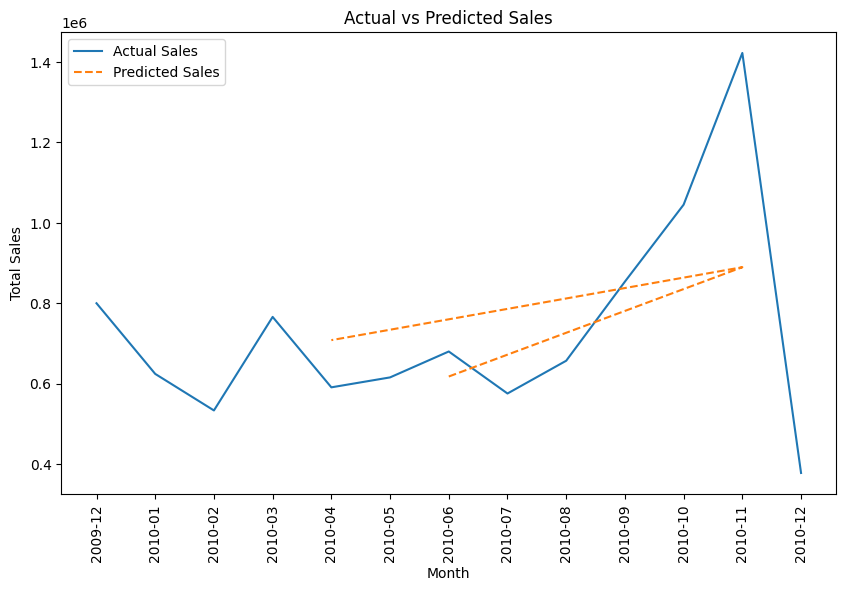

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fatura tarihlerinde boş veya hatalı değerleri kontrol edin ve çıkarın
data = data.dropna(subset=['InvoiceDate'])
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Toplam harcama miktarını hesaplayalım
data['TotalPrice'] = data['Quantity'] * data['Price']

# Aylık toplam satışları hesaplayalım
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month').agg({'TotalPrice': 'sum'}).reset_index()

# Zaman serisi verisini hazırlayalım
X = np.array(range(len(monthly_sales))).reshape(-1, 1)
y = monthly_sales['TotalPrice'].values

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Forest modelini oluşturun ve eğitin
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Modeli test edin ve performansını değerlendirin
y_pred = model.predict(X_test)

# Performans metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R² Score:', r2)

# Modelin sonuçlarını görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), y, label='Actual Sales')
plt.plot(monthly_sales['Month'].astype(str)[X_test.flatten()], y_pred, label='Predicted Sales', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
